In [1]:
import numpy as np
import pandas as pd
import numpy as np
import os
import sys
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import wave
from scipy.io.wavfile import write
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
Features= pd.read_csv("../speech_emotion_reco/data/features1.csv")

In [30]:
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.022190,0.574264,0.483570,0.460849,0.481321,0.555484,0.593383,0.527021,0.487356,0.539324,...,0.000017,0.000005,0.000002,1.302462e-06,1.284306e-06,0.000001,0.000001,0.000001,1.307451e-06,sad
1,0.024034,0.600490,0.566040,0.508995,0.517747,0.564668,0.628690,0.570408,0.504077,0.523364,...,0.000694,0.000707,0.000760,7.191862e-04,7.346970e-04,0.000748,0.000710,0.000721,7.125463e-04,sad
2,0.026794,0.555865,0.481998,0.469905,0.485150,0.561153,0.599452,0.515703,0.467281,0.533736,...,0.000009,0.000003,0.000001,1.101190e-06,1.086457e-06,0.000001,0.000001,0.000001,1.116437e-06,sad
3,0.030215,0.569947,0.537033,0.472541,0.482542,0.531870,0.609241,0.538805,0.472551,0.501115,...,0.000029,0.000010,0.000004,2.024705e-06,1.428292e-06,0.000001,0.000001,0.000001,1.116235e-06,sad
4,0.021918,0.572923,0.493467,0.462107,0.478409,0.544882,0.593050,0.524531,0.479771,0.534424,...,0.000017,0.000005,0.000001,9.656201e-07,9.702152e-07,0.000001,0.000001,0.000001,8.766840e-07,sad


In [31]:
Features=Features[Features.labels != 'unknown']
Features=Features[Features.labels != 'surprise']

In [32]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [33]:
Features['labels'].value_counts()

happy      9620
sad        9615
angry      9615
fear       9615
disgust    9615
neutral    9475
Name: labels, dtype: int64

In [8]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [34]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame(X), pd.DataFrame(Y), random_state=0, shuffle=True, test_size=0.12)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50648, 162), (50648, 1), (6907, 162), (6907, 1))

In [35]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
#x_train = scaler.fit(x_train)
#x_test = scaler.transform(x_test)
#x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [36]:
#MLP clasiifier sans pca
#52 % moins over fittint model= MLPClassifier(hidden_layer_sizes=(200,), max_iter=300)
# 55% model = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (500,), learning_rate = 'adaptive', max_iter = 600)
#model = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (400,), learning_rate = 'adaptive', max_iter = 500)
# 54% model = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (500,), learning_rate = 'adaptive', max_iter = 900)
#53% model = MLPClassifier(alpha = 0.09, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (500,), learning_rate = 'adaptive', max_iter = 600)
#56% model = MLPClassifier(alpha = 0.03, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (700,), learning_rate = 'adaptive', max_iter = 800,  validation_fraction=0.2)
#54model = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (700,), learning_rate = 'adaptive', max_iter = 800,  validation_fraction=0.2)
# 52% et 70% model= MLPClassifier(hidden_layer_sizes=(400,), max_iter=600, alpha = 0.1, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)
#53% 69% avec standardisation model= MLPClassifier(hidden_layer_sizes=(500,), max_iter=600, alpha = 0.1, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive', validation_fraction=0.2)
#44% 54% model= MLPClassifier(hidden_layer_sizes=(500,), max_iter=600, alpha = 0.2, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)

#68% 52 % sans split validation model= MLPClassifier(hidden_layer_sizes=(500,), max_iter=600, alpha = 0.1, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive')

#70% 53% avec split=0.3 model= MLPClassifier(hidden_layer_sizes=(500,), max_iter=600, alpha = 0.1, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.3)

#90% 59% model= MLPClassifier(hidden_layer_sizes=(600,50), max_iter=600, alpha = 0.1, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)

# 85% 58% model= MLPClassifier(hidden_layer_sizes=(600,50), max_iter=600, alpha = 0.2, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)

#85% 58.2% model= MLPClassifier(hidden_layer_sizes=(600,20), max_iter=600, alpha = 0.2, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)

##79% 55% model= MLPClassifier(hidden_layer_sizes=(600,10), max_iter=700, alpha = 0.2, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)

#86% 60% model= MLPClassifier(hidden_layer_sizes=(600,20,10), max_iter=600, alpha = 0.2, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)


#86% 61% model= MLPClassifier(hidden_layer_sizes=(600,20,20), max_iter=600, alpha = 0.2, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)

#86% 60% model= MLPClassifier(hidden_layer_sizes=(600,20,30), max_iter=600, alpha = 0.25, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)

# 90% 62% model= MLPClassifier(hidden_layer_sizes=(600,20,20), max_iter=600, alpha = 0.12, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)

# 89% 62% model= MLPClassifier(hidden_layer_sizes=(600,20,20), max_iter=600, alpha = 0.27, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)
#84% 30% model= MLPClassifier(hidden_layer_sizes=(600,20,20), max_iter=600, alpha = 0.35, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)

#81ù 60% model= MLPClassifier(hidden_layer_sizes=(500,20,20), max_iter=600, alpha = 0.35, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)

# 85% 61% model= MLPClassifier(hidden_layer_sizes=(500,20,20), max_iter=600, alpha = 0.25, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)
# 83% 60% model= MLPClassifier(hidden_layer_sizes=(300,20,20), max_iter=600, alpha = 0.25, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)

#78% 57% model= MLPClassifier(hidden_layer_sizes=(200,20,20), max_iter=800, alpha = 0.15, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)
#77% 57% model= MLPClassifier(hidden_layer_sizes=(200,20,20), max_iter=600, alpha = 0.23, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)

#76% 57% 
model= MLPClassifier(hidden_layer_sizes=(600,20,20), activation="relu",max_iter=600, alpha = 0.17, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.2)



In [37]:
x_train.shape

(50648, 162)

In [39]:
pipe=Pipeline([('sd',StandardScaler()),
              ("model",model)])

hist= pipe.fit(x_train, y_train)

/home/mateo/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mateo/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [115]:
from joblib import dump
dump(pipe, "Mlp_mateo_2.joblib")

['Mlp_mateo_2.joblib']

In [116]:
## train accuracy
y_pred_train = pipe.predict(x_train)
accuracy_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
accuracy_train

0.848305954825462

In [117]:
#test accuracy
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(x_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy

0.773563051976256

In [43]:
pred= pipe.predict_proba(x_test)

In [52]:
sumcol=pd.DataFrame(pred)

In [55]:
sumcol=sumcol.sum(axis=1)

In [61]:
sumcol.sum()

6907.0

In [45]:
from fastapi import FastAPI
from joblib import load
from pydantic import  BaseModel
import subprocess
from speech_emotion_reco.mateo_preprocess import sound_to_number
from speech_emotion_reco.raph_data import get_array
from fastapi import FastAPI, File, UploadFile
from speech_emotion_reco.combine_models import combine_predict
import shutil 
import io
import os

In [48]:
def convert_mp3(path_myrecording):
    # convert mp3 to wav file
    subprocess.call(['ffmpeg', '-i', path_myrecording,
             '../samples/converted_to_wav_file.wav'])
    
    X_1 = sound_to_number("../samples/converted_to_wav_file.wav")
    
    X_2 = get_array("../samples/converted_to_wav_file.wav")
    
    os.remove("../samples/converted_to_wav_file.wav")
    
    return X_1, X_2

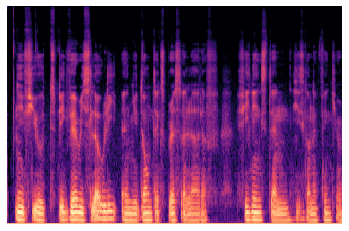

In [49]:
###Test
x1, x2 = convert_mp3("../recording.mp3")


In [54]:
pipe.predict_proba(pd.DataFrame(x1).T)

array([[7.94444300e-178, 4.69789864e-143, 3.83250932e-130,
        1.61375302e-051, 2.78164138e-041, 1.00000000e+000]])

In [32]:
def extract_features(data):
    # ZCR
    sample_rate=22050
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally
    
    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

In [33]:
#function to create data set
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
        
    return result

In [80]:
test= pd.DataFrame(get_features("../speech_emotion_reco/data/Recording11.wav"))
test = scaler.transform(test.transpose())

In [81]:
(model.predict(test))

array([[0, 0, 1, 0, 0, 0]])

In [82]:
model.predict_proba(test)

array([[5.51163680e-09, 1.55163149e-06, 9.99999216e-01, 3.53873529e-06,
        9.15688196e-09, 5.10935521e-09]])

In [83]:
encoder.get_feature_names()

array(['x0_angry', 'x0_disgust', 'x0_fear', 'x0_happy', 'x0_neutral',
       'x0_sad'], dtype=object)

In [84]:
encoder.inverse_transform((model.predict(test)))

array([['fear']], dtype=object)

# combine model

In [1]:
########### Test features combinate with raphael's model

In [98]:
Features= pd.read_csv("../speech_emotion_reco/data/features2.csv")

In [99]:
Features=Features[Features.labels != 'unknown']
Features=Features[Features.labels != 'surprise']

In [100]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [101]:
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [102]:
X["observation"]=Features["observation"]

In [103]:
Y["observation"]=Features["observation"]

In [104]:
test_raph= pd.read_csv("../speech_emotion_reco/data/df_test.csv")

In [105]:
train_raph= pd.read_csv("../speech_emotion_reco/data/df_train.csv") 

In [106]:
test_raph.head()

,observation,path,emotion
0,0_original,../speech_emotion_reco/data/images_augmented/o...,1
1,0_stretch,../speech_emotion_reco/data/images_augmented/s...,1
2,10000_original,../speech_emotion_reco/data/images_augmented/o...,2
3,10000_pitch,../speech_emotion_reco/data/images_augmented/p...,2
4,10001_noise,../speech_emotion_reco/data/images_augmented/n...,2


In [107]:
X_test= test_raph.merge(X, on="observation", how="left")
X_train= train_raph.merge(X, on="observation", how="left")

In [108]:
Y_test= test_raph.merge(Y, on="observation", how="left")
Y_train= train_raph.merge(Y, on="observation", how="left")

In [109]:
Y_test.head()

,observation,path,emotion,0
0,0_original,../speech_emotion_reco/data/images_augmented/o...,1,sad
1,0_stretch,../speech_emotion_reco/data/images_augmented/s...,1,sad
2,10000_original,../speech_emotion_reco/data/images_augmented/o...,2,fear
3,10000_pitch,../speech_emotion_reco/data/images_augmented/p...,2,fear
4,10001_noise,../speech_emotion_reco/data/images_augmented/n...,2,fear


In [74]:
X_test.shape

(17162, 166)

In [75]:
Y_test= Y_test.drop(columns=["observation","path","emotion"])
Y_train= Y_train.drop(columns=["observation","path","emotion"])

In [76]:
X_test=X_test.drop(columns=["observation","path","emotion", 162])
X_train=X_train.drop(columns=["observation","path","emotion", 162])

In [77]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,0.0221897,0.574264,0.48357,0.460849,0.481321,0.555484,0.593383,0.527021,0.487356,0.539324,...,4.87774e-05,1.73186e-05,5.48789e-06,1.68174e-06,1.30246e-06,1.28431e-06,1.30493e-06,1.35532e-06,1.41604e-06,1.30745e-06
1,0.026794,0.555865,0.481998,0.469905,0.48515,0.561153,0.599452,0.515703,0.467281,0.533736,...,2.52655e-05,8.61541e-06,3.09115e-06,1.30925e-06,1.10119e-06,1.08646e-06,1.10269e-06,1.14628e-06,1.20398e-06,1.11644e-06
2,0.0515555,0.714576,0.700411,0.701325,0.701692,0.685604,0.712785,0.744064,0.750902,0.775232,...,6.02777e-09,5.01964e-09,4.31002e-09,3.79778e-09,3.41328e-09,3.12277e-09,2.90639e-09,2.74693e-09,2.63853e-09,2.57304e-09
3,0.0547294,0.647267,0.696228,0.675197,0.670335,0.64938,0.639625,0.672559,0.736784,0.714888,...,9.19049e-09,7.05451e-09,5.77282e-09,4.88446e-09,4.27811e-09,3.86587e-09,3.54994e-09,3.31682e-09,3.09062e-09,2.96896e-09
4,0.260031,0.693351,0.641952,0.669057,0.679532,0.728286,0.692397,0.658068,0.648194,0.617139,...,0.0083004,0.00786447,0.00824918,0.00840053,0.00835055,0.00845584,0.00877342,0.00841933,0.00935976,0.00926022


In [106]:
encoder = OneHotEncoder()
Y_train = encoder.fit_transform(np.array(Y_train).reshape(-1,1)).toarray()

In [107]:
Y_test= encoder.transform(Y_test)

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((40045, 162), (40045, 1), (17162, 162), (17162, 1))

In [79]:
model= MLPClassifier(hidden_layer_sizes=(600,20,20), max_iter=600, alpha = 0.12, batch_size = 256, epsilon = 1e-08,learning_rate = 'adaptive',validation_fraction=0.4)


In [80]:
hist= model.fit(X_train, Y_train)

/home/mateo/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
## train accuracy
from sklearn.metrics import accuracy_score
Y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_true=Y_train, y_pred=Y_pred_train)
accuracy_train

0.9253589711574479

In [82]:
#test accuracy
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true=Y_test, y_pred=Y_pred)
accuracy

0.7753175620557045

In [110]:
X_pred_test_raph= model.predict_proba(X_test)

ValueError: could not convert string to float: '0_original'

In [84]:
X_pred_test_raph = pd.DataFrame(X_pred_test_raph)

In [111]:
X_pred_test_raph["observation"]=X_test["observation"]

In [112]:
X_test.shape

(17162, 166)

In [114]:
X_pred_test_raph.to_csv("test_proba_raph.csv", index=False)

In [84]:
pd.DataFrame(encoder.inverse_transform((model.predict(X_test))))[0].head(20)

0         sad
1         sad
2        fear
3     disgust
4       angry
5        fear
6       happy
7     disgust
8       angry
9         sad
10        sad
11       fear
12       fear
13      angry
14       fear
15        sad
16      happy
17      happy
18      angry
19      angry
Name: 0, dtype: object

In [113]:
X_pred_test_raph.head()

,0,1,2,3,4,5,observation
0,1.616208e-11,2.134464e-12,1.460663e-13,4.409918e-13,5.653151e-08,9.999999e-01,0_original
1,1.672562e-11,3.165578e-09,2.198760e-13,2.584983e-14,3.584436e-03,9.964156e-01,0_stretch
2,1.259468e-03,1.453759e-01,7.865263e-01,4.141146e-03,5.245385e-02,1.024333e-02,10000_original
3,1.595557e-05,8.552465e-01,1.037437e-01,3.553745e-04,8.847054e-03,3.179137e-02,10000_pitch
4,5.397204e-02,7.015372e-06,1.515441e-03,9.445052e-01,7.415917e-11,3.269958e-07,10001_noise


In [89]:
encoder.get_feature_names()

array(['x0_angry', 'x0_disgust', 'x0_fear', 'x0_happy', 'x0_neutral',
       'x0_sad'], dtype=object)